# IT Help Desk

###### Analyze helpdesk tickets, including number, amount of high priority, average response time and more. Understand what causes high priority tickets and improve resolution times with better understanding of ticket details.

In [63]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

# 1 Get the Data

In [64]:
df = pd.read_csv('11 WA_Fn-UseC_-IT-Help-Desk.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
ticket                100000 non-null int64
requestor             100000 non-null int64
RequestorSeniority    100000 non-null object
ITOwner               100000 non-null int64
FiledAgainst          100000 non-null object
TicketType            100000 non-null object
Severity              100000 non-null object
Priority              100000 non-null object
daysOpen              100000 non-null int64
Satisfaction          100000 non-null object
dtypes: int64(4), object(6)
memory usage: 7.6+ MB


In [65]:
df1 = df[(df['Severity'] !='0 - Unclassified') & (df['Priority'] !='0 - Unassigned') 
        & (df['Satisfaction'] !='0 - Unknown')].copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48624 entries, 1 to 99999
Data columns (total 10 columns):
ticket                48624 non-null int64
requestor             48624 non-null int64
RequestorSeniority    48624 non-null object
ITOwner               48624 non-null int64
FiledAgainst          48624 non-null object
TicketType            48624 non-null object
Severity              48624 non-null object
Priority              48624 non-null object
daysOpen              48624 non-null int64
Satisfaction          48624 non-null object
dtypes: int64(4), object(6)
memory usage: 4.1+ MB


In [66]:
def func_RS(x):
    if x=='1 - Junior': return '1 - Junior'
    elif x=='2 - Regular': return '2 - Regular'
    else: return '3 - Senior Management'
df1['RequestorSeniority bin'] = df1['RequestorSeniority'].apply(func_RS)

In [67]:
def func_FA(x):
    if x=='Hardware': return '1 - Hardware'
    elif x in ('Software','Systems'): return '2 - Software & Systems'
    else: return '3 - Others'
df1['FiledAgainst bin'] = df1['FiledAgainst'].apply(func_FA)

In [68]:
df1['TicketType bin'] = df1['TicketType'].apply(lambda x: '1 - Request' if x=='Request' else '2 - Issue')

In [69]:
df1['Severity bin'] = df1['Severity'].apply(lambda x: '2 - Minor' if x=='1 - Minor' else '1 - Major')

In [70]:
df2 = df1.drop(['ticket','requestor','ITOwner','RequestorSeniority','FiledAgainst','TicketType','Severity']
               ,axis=1).copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48624 entries, 1 to 99999
Data columns (total 7 columns):
Priority                  48624 non-null object
daysOpen                  48624 non-null int64
Satisfaction              48624 non-null object
RequestorSeniority bin    48624 non-null object
FiledAgainst bin          48624 non-null object
TicketType bin            48624 non-null object
Severity bin              48624 non-null object
dtypes: int64(1), object(6)
memory usage: 3.0+ MB


# 2a RequestorSeniority

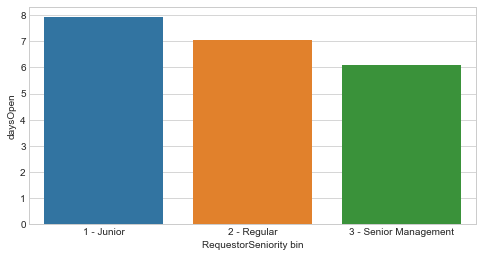

In [71]:
temp = pd.DataFrame(df2.groupby(['RequestorSeniority bin'], axis=0, as_index=False)['daysOpen'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x="RequestorSeniority bin", y="daysOpen",data=temp)

# 2b FiledAgainst

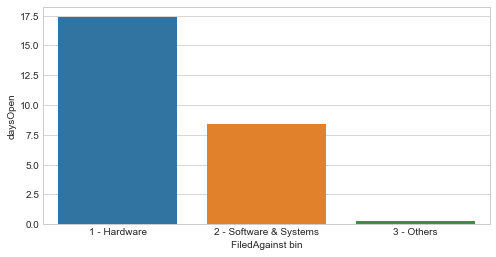

In [72]:
temp = pd.DataFrame(df2.groupby(['FiledAgainst bin'], axis=0, as_index=False)['daysOpen'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x="FiledAgainst bin", y="daysOpen",data=temp)

# 2c TicketType

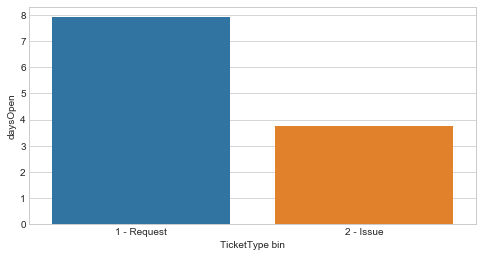

In [73]:
temp = pd.DataFrame(df2.groupby(['TicketType bin'], axis=0, as_index=False)['daysOpen'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x="TicketType bin", y="daysOpen",data=temp)

# 2d Severity

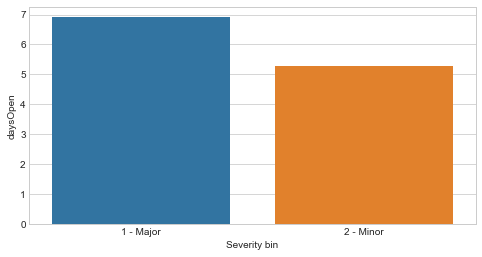

In [74]:
temp = pd.DataFrame(df2.groupby(['Severity bin'], axis=0, as_index=False)['daysOpen'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x="Severity bin", y="daysOpen",data=temp)

# 2e Priority

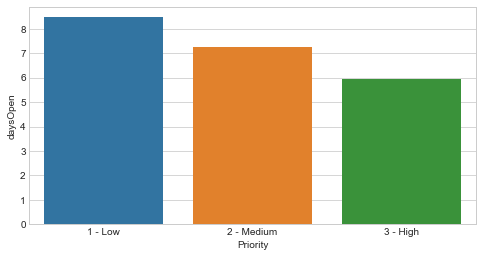

In [75]:
temp = pd.DataFrame(df2.groupby(['Priority'], axis=0, as_index=False)['daysOpen'].mean())
plt.figure(figsize=(8,4))
sns.barplot(x="Priority", y="daysOpen",data=temp)

# 3a Analyzing the issues leading to higher daysOpen

In [76]:
df3 = df2[df2['TicketType bin']=='1 - Request'].copy()
temp = pd.DataFrame(df3.groupby(['RequestorSeniority bin','FiledAgainst bin','Severity bin','Priority'], 
                                axis=0, as_index=False)['daysOpen'].mean())
print('1 - Request (top 5)')
temp.sort_values('daysOpen',ascending=False).head()

1 - Request (top 5)


,RequestorSeniority bin,FiledAgainst bin,Severity bin,Priority,daysOpen
4,1 - Junior,1 - Hardware,2 - Minor,2 - Medium,29.800000
39,3 - Senior Management,1 - Hardware,2 - Minor,1 - Low,27.250000
18,2 - Regular,1 - Hardware,1 - Major,1 - Low,24.138686
0,1 - Junior,1 - Hardware,1 - Major,1 - Low,23.895000
40,3 - Senior Management,1 - Hardware,2 - Minor,2 - Medium,23.250000


In [77]:
df3 = df2[df2['TicketType bin']=='2 - Issue'].copy()
temp = pd.DataFrame(df3.groupby(['RequestorSeniority bin','FiledAgainst bin','Severity bin','Priority'], 
                                axis=0, as_index=False)['daysOpen'].mean())
print('2 - Issue (top 5)')
temp.sort_values('daysOpen',ascending=False).head()

2 - Issue (top 5)


,RequestorSeniority bin,FiledAgainst bin,Severity bin,Priority,daysOpen
37,3 - Senior Management,1 - Hardware,2 - Minor,1 - Low,21.000000
16,2 - Regular,1 - Hardware,1 - Major,1 - Low,14.300000
0,1 - Junior,1 - Hardware,1 - Major,1 - Low,13.841727
34,3 - Senior Management,1 - Hardware,1 - Major,1 - Low,13.318182
1,1 - Junior,1 - Hardware,1 - Major,2 - Medium,12.983871


# 3b Analyzing the top reasons for unsatisfaction

In [78]:
df3 = df2[df2['Satisfaction']=='1 - Unsatisfied'].copy()
temp = pd.DataFrame(df3.groupby(['RequestorSeniority bin','FiledAgainst bin','Severity bin','Priority'], 
                                axis=0, as_index=False)['Satisfaction'].count())
print('1 - Unsatisfied (top 5)')
temp.sort_values('Satisfaction',ascending=False).head()

1 - Unsatisfied (top 5)


,RequestorSeniority bin,FiledAgainst bin,Severity bin,Priority,Satisfaction
42,3 - Senior Management,2 - Software & Systems,1 - Major,3 - High,2582
24,2 - Regular,2 - Software & Systems,1 - Major,3 - High,1523
48,3 - Senior Management,3 - Others,1 - Major,3 - High,1217
23,2 - Regular,2 - Software & Systems,1 - Major,2 - Medium,1150
5,1 - Junior,2 - Software & Systems,1 - Major,1 - Low,1042
